In [1]:
# Tutorial on using the greedy fit in pySurrogate.fit
import numpy as np
import pySurrogate as pySur
fit = pySur.fit
fit_greedy = pySur.fit_greedy
evalute_fit = pySur.evaluate_fit
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('always')

## Simple 1-d polynomial fit example

**Note**: Do not commit this notebook with changes to test values or parameters. It is used as a regression test in test_1d_fits.

Termination criterion:
All residuals are below or equal (absTol + relTol*yVals)
fit results:

minVals: array([0.])
maxVals: array([5.])
bfTypes: ['chebyshev']
coefs: array([-0.79565569, -0.53601709,  0.34752995,  0.08814608, -0.03029912,
       -0.03145176])
bfOrders: array([[1],
       [2],
       [3],
       [4],
       [0],
       [5]])
rmsResids: array([0.71964278, 0.47710685, 0.27644073, 0.07661568, 0.03793286,
       0.02434917, 0.0035759 ])
maxResids: array([0.99540796, 0.84406371, 0.41152716, 0.14591567, 0.06968541,
       0.04230377, 0.00535217])
terminationCriterion: 1


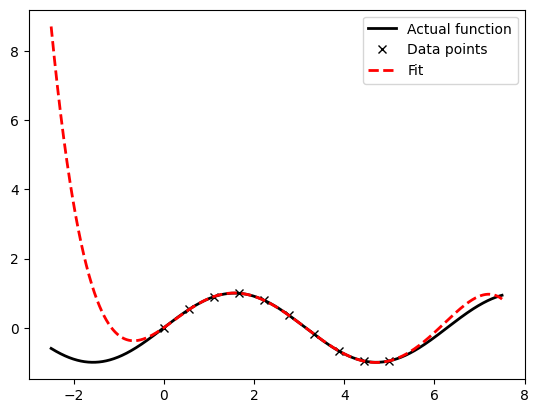

In [2]:
# Here is the exact solution:
def f(x):
    return np.sin(x)

# Choose some data points - let's fit between 0 and 5:
xMin = 0.
xMax = 5.
nPts = 10
xVals = np.linspace(xMin, xMax, nPts)
yVals = f(xVals)

# fit expects each x value to be an array
xVals = np.array([xVals]).T

# Some fit options:
options = {
            'minVals': xMin,
            'maxVals': xMax,
            'absTol': 1.e-2,
}

# Do the fit:
result = fit.fitWrapper(xVals, yVals, **options)
print('Termination criterion:')
print(fit_greedy.tcString(result['terminationCriterion']))
print('fit results:\n')
for k, v in result.items():
    print('%s: %r'%(k, v))

# Get a function which evaluates the fit:
fitFunc = evalute_fit.getFitEvaluator(result)

# evaluate at many points and plot the results:
width = xMax - xMin
xDense = np.linspace(xMin - width/2., xMax + width/2., nPts*100)
plt.plot(xDense, np.sin(xDense), 'k', lw=2., label='Actual function')
plt.plot(xVals.T[0], yVals, 'kx', label='Data points')
plt.plot(xDense, np.array([fitFunc(x) for x in np.array([xDense]).T]), 'r--', lw=2., label='Fit')
plt.legend(loc='upper right')
plt.show()


##  2-d complex fit example using polynomials and complex exponentials

**Note**: Do not commit this notebook with changes to test values or parameters. It is used as a regression test in test_2d_fits

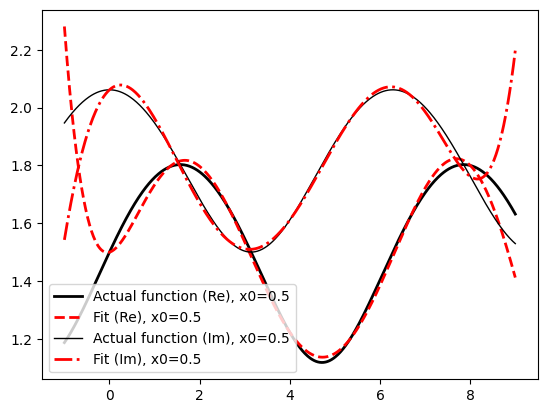

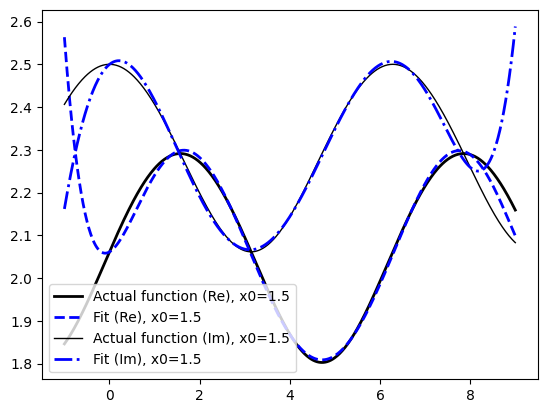

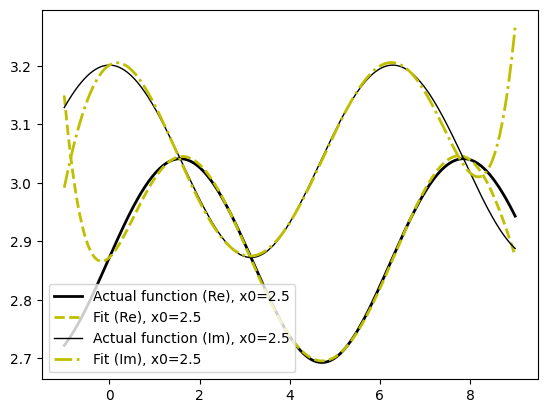

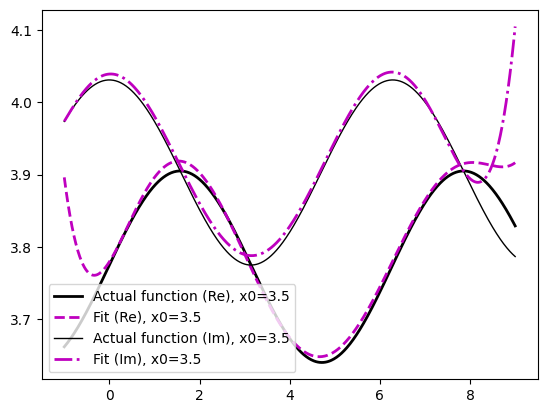

In [15]:
# Here is the exact solution, which is periodic in x1 with period 2*pi:
def f(x):
    x0, x1 = x
    return np.sqrt(2. + x0*x0 + np.sin(x1)) + 1.j*np.sqrt(3. + x0*x0 + np.cos(x1))

# Choose some data points:
xMin = np.array([0., 0.])
xMax = np.array([3., 8.])
ptsPerDim = 7
xVals = np.array([[x1, x2] for x1 in np.linspace(xMin[0], xMax[0], ptsPerDim)
                           for x2 in np.linspace(xMin[1], xMax[1], ptsPerDim)])
yVals = np.array([f([x1, x2]) for x1 in np.linspace(xMin[0], xMax[0], ptsPerDim)
                           for x2 in np.linspace(xMin[1], xMax[1], ptsPerDim)])

# Use at most 6th degree basis functions in each dimension:
bfMaxOrders = [6, 6]

# Fit options:
options = {
            'minVals': xMin,
            'maxVals': xMax,
            'absTol': 1.e-3,
            'bfMaxOrders': bfMaxOrders,
            }

# Do the fit:
result = fit.fitWrapper(xVals, yVals, **options)

# Get a function which evaluates the fit:
fitFunc = evalute_fit.getFitEvaluator(result)

# evaluate for some fixed x0 value and plot the results:
x1Vals = np.linspace(xMin[1]-1., xMax[1]+1., ptsPerDim*100)
for x0, c in [(0.5, 'r'), (1.5, 'b'), (2.5, 'y'), (3.5, 'm')]:
    xVals = np.array([[x0, x1] for x1 in x1Vals])
    plt.plot(x1Vals, np.array([np.real(f(x)) for x in xVals]), color='k', lw=2., label='Actual function (Re), x0={}'.format(x0))
    plt.plot(x1Vals, np.array([np.real(fitFunc(x)) for x in xVals]), c + '--', lw=2., label='Fit (Re), x0={}'.format(x0))
    plt.plot(x1Vals, np.array([np.imag(f((x0, x1))) for x1 in x1Vals]), color='k', lw=1., label='Actual function (Im), x0={}'.format(x0))
    plt.plot(x1Vals, np.array([np.imag(fitFunc(x)) for x in xVals]), c + '-.', lw=2., label='Fit (Im), x0={}'.format(x0))
    plt.legend()
    plt.show()
    
plt.semilogy(range(0, len(result['coefs']) + 1), result['maxResids'], label='max resid')
plt.semilogy(range(0, len(result['coefs']) + 1), result['rmsResids'], label='rms resid')
plt.xlabel('nCoefs')
plt.legend()
plt.show()




In [3]:



# Here is the exact solution, which is periodic in x1 with period 2*pi:
def f(x):
    x0, x1 = x
    return np.sqrt(2. + x0*x0 + np.sin(x1)) + 1.j*np.sqrt(3. + x0*x0 + np.cos(x1))

# Choose some data points:
xMin = np.array([0., 0.])
xMax = np.array([3., 8.])
ptsPerDim = 7
xVals = np.array([[x1, x2] for x1 in np.linspace(xMin[0], xMax[0], ptsPerDim)
                           for x2 in np.linspace(xMin[1], xMax[1], ptsPerDim)])
yVals = np.array(map(f, xVals))

# Use at most 6th degree basis functions in each dimension:
bfMaxOrders = [6, 6]

# Fit options:
options = {
            'minVals': xMin,
            'maxVals': xMax,
            'absTol': 1.e-3,
            'bfMaxOrders': bfMaxOrders,
            }

# Do the fit:
result = fit.fitWrapper(xVals, yVals, **options)

# Get a function which evaluates the fit:
fitFunc = evalute_fit.getFitEvaluator(result)

# evaluate for some fixed x0 value and plot the results:
x1Vals = np.linspace(xMin[1]-1., xMax[1]+1., ptsPerDim*100)
for x0, c in [(0.5, 'r'), (1.5, 'b'), (2.5, 'c'), (3.5, 'm')]:
    xVals = np.array([[x0, x1] for x1 in x1Vals])
    plt.plot(x1Vals, np.array([np.real(f((x0, x1))) for x1 in x1Vals]), c, lw=2., label='Actual function (Re), x0={}'.format(x0))
    plt.plot(x1Vals, np.array([np.real(fitFunc(x)) for x in xVals]), c + '--', lw=2., label='Fit (Re), x0={}'.format(x0))
    plt.plot(x1Vals, np.array([np.imag(f((x0, x1))) for x1 in x1Vals]), c, lw=1., label='Actual function (Im), x0={}'.format(x0))
    plt.plot(x1Vals, np.array([np.imag(fitFunc(x)) for x in xVals]), c + '-.', lw=2., label='Fit (Im), x0={}'.format(x0))
    plt.legend()
    plt.show()
    
plt.semilogy(range(0, len(result['coefs']) + 1), result['maxResids'], label='max resid')
plt.semilogy(range(0, len(result['coefs']) + 1), result['rmsResids'], label='rms resid')
plt.xlabel('nCoefs')
plt.legend()
plt.show()

TypeError: len() of unsized object

## Simple 1-d polynomial fit example with FittedFunction object

**Note**: Do not commit this notebook with changes to test values or parameters. It is used as a regression test in test_1d_fit_FittedFunction

In [20]:
# Here is the exact solution:
def f(x):
    return np.sin(x)

# Make a FittedFunction object and give it a name:
ff = pySur.FittedFunction('1d-polynomial-fitter')

# Choose some data points - let's fit between 0 and 5:
xMin = 0.
xMax = 5.
nPts = 10

# Add the data points to the FittedFunction:
for x in np.linspace(xMin, xMax, nPts):
    ff.addKnownDataSet(np.array([x]), f(x))

ff.setupFits(minVals=xMin, maxVals=xMax, absTol=1.e-2)

# Do the fit:
ff.fit()

# Evaluate:
print(ff([3.]))

# evaluate at many points:
width = xMax - xMin
xDense = np.linspace(xMin - width/2., xMax + width/2., nPts*100)
evals = np.array([ff([x]) for x in xDense])
# Notice we get a bunch of warnings since we are extrapolating.

0.14079554627634797


/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [-2.5] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [-2.48998998998999] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [-2.47997997997998] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [-2.46996996996997] outside of fit range!
  warnings.warn('Params {} outside of fit range!'.format(x))
/Users/gopalprabhu/Desktop/Surrogate_project/Surrogate_py/notebooks/pySurrogate/nodeModeler.py:150: UserWarning: Params [

In [10]:
# plot the results:
plt.plot(xDense, np.sin(xDense), 'k', lw=2., label='Actual function')
plt.plot(ff.xVals.T[0], ff.yVals, 'kx', label='Data points')
plt.plot(xDense, evals, 'r--', lw=2., label='Fit')
plt.legend()
plt.show()

In [21]:
# When we called ff.setupFits, we change the attributes of ff by passing kwargs.
# Here's what we could modify:
print(fit_greedy.DEFAULTS.keys())

dict_keys(['bfTypes', 'bfMaxOrders', 'minVals', 'maxVals', 'absTol', 'relTol', 'rmsCutoff', 'maxCoefConst', 'maxCoefFrac', 'useReconstructionErrors'])


In [22]:
# We can, alternatively, pass kwargs to ff.fit, which will first call setupFits():

ff.fit(absTol=1.e-4)
print('Achieved a cutoff of {} with {} coefficients'.format(ff.fitOptions['absTol'], len(ff.fitResults['coefs'])))
errs = abs(np.array([ff(x) for x in ff.xVals]) - ff.yVals)
print('Absolute residuals:')
print(errs)

ff.fit(absTol=1.e-1)
print('\nAchieved a cutoff of {} with {} coefficients'.format(ff.fitOptions['absTol'], len(ff.fitResults['coefs'])))
errs = abs(np.array([ff(x) for x in ff.xVals]) - ff.yVals)
print('Absolute residuals:')
print(errs)

Achieved a cutoff of 0.0001 with 9 coefficients
Absolute residuals:
[3.29425090e-06 2.30597563e-05 6.58850181e-05 9.22390253e-05
 4.61195126e-05 4.61195126e-05 9.22390253e-05 6.58850181e-05
 2.30597563e-05 3.29425090e-06]

Achieved a cutoff of 0.1 with 4 coefficients
Absolute residuals:
[0.02081897 0.06968541 0.03238608 0.00654934 0.00464739 0.02953304
 0.05451198 0.03563958 0.00546931 0.05331355]


In [24]:
# The nice thing about FittedFunction objects is that we can save and load them!
import os
if os.path.exists('example_FittedFunction.h5'):
    os.remove('example_FittedFunction.h5')
ff.saveH5('example_FittedFunction.h5')
ff2 = pySur.FittedFunction('Dummy name')
ff2.loadH5('example_FittedFunction.h5')

print(ff2.name)
print(ff.yVals - ff2.yVals)

1d-polynomial-fitter
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
